

### **Git Repository:** [02467-assignment-2](https://github.com/Glymse/NLTK-Graph-02467-assignment2)  



| Part    | s234815 | s234845 | s224187 |  
|---------|---------|---------|---------|  
| **Part 1** | 60% | 40% | 0% |  
| **Part 2** | 40% | 60% | 0% |  
| **Part 3** | 50% | 50% | 0% |  

---


We have had minor contact with mikkel (s224187), but he has not responded to any invitation prior to that. We have written both on mail and messenger.


In [44]:
# Imports
import json
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import matplotlib.patches as mpatches
import community as community_louvain
from sklearn.metrics import confusion_matrix
from joblib import Parallel, delayed
from IPython.display import Image, display

# Formalia

Please read the [assignment overview page](https://github.com/TheYuanLiao/comsocsci2025/wiki/Assignments) carefully before proceeding. The page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment.

We teach about Pandas Dataframe and there is a video on how to use pandas and mistakes not to make when using it (see [Week 2](https://nbviewer.org/github/TheYuanLiao/comsocsci2025/blob/main/lectures/Week2.ipynb)/Prelude to part 3: Pandas Dataframes). We expect you to apply that knowledge in all exercises. A score of 3 means "excellent", where we expect you to deliver efficient dataframe operations, i.e., operations are implemented in a vectorized, efficient manner using pandas recommended practices.

__If you fail to follow these simple instructions, it will negatively impact your grade!__

**Due date and time**: The assignment is due on April 1st at 23:59. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Assignment 2)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository 
* group members' contributions


## Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5. Please note that 2 Degree distribution is taken out and 3 Shortest paths is numbered 2 here.
> __Exercise: Analyzing Networks through a Random Model__ 
>
>
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 
>
> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
>
>   
> 2. _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).
> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html).
> * Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.
> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only?
>   - Why do you think I asked you to consider unweighted edges?
>   - Does the Computational Social Scientists network exhibit the small-world phenomenon?




### 1.1.1: Random Network

#### Calculate $p$ and average degree $\langle k \rangle$

Equation 3.2:
$$
\left\langle L \right\rangle  = \sum\limits_{L = 0}^{\frac{{N(N - 1)}}{2}} {Lp_L }  = p\frac{{N(N - 1)}}{2}
$$

using this equation we set $\left\langle L \right\rangle$ equal to the number of expected edges/links in the social science dataset and solve for $p$:
$$
p = \frac{2\langle L \rangle}{N(N-1)}
$$

Using Equation 3.3, we can just plug in the $p$ we derived from above:
$$
\left\langle k \right\rangle  = p(N - 1) = \frac{2\langle L \rangle}{N(N-1)} (N-1) = \frac{2\langle L \rangle}{N}
$$

Note:
- $N$ is the number of nodes
- $p$ is a probability threshold

In [8]:
def read_json_graph(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return nx.readwrite.json_graph.node_link_graph(js_graph)

# Import graph
G = read_json_graph("coauthorship_network.json") # generated using "create-network.py"
N = G.number_of_nodes()
L = G.number_of_edges()

# Compute p
p = (2 * L) / (N * (N-1))
print(f"p = {p}")

# Compute k
avg_k = p * (N-1)
print(f"<k> = {avg_k}")

p = 0.0003598450083227883
<k> = 6.433668903803132


/Users/glymov/DTU/4 Semester/Social/social_env/lib/python3.13/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


#### Write a function to generate a random network

We now write a function to generate random networks based on $N$ and the calculated $p$:

In [15]:
def random_network(N, p):
    G = nx.generators.random_graphs.fast_gnp_random_graph(N, p) # faster for sparse networks, where p is small

    return G

#### Visualizing the random network

Let's visualize it:

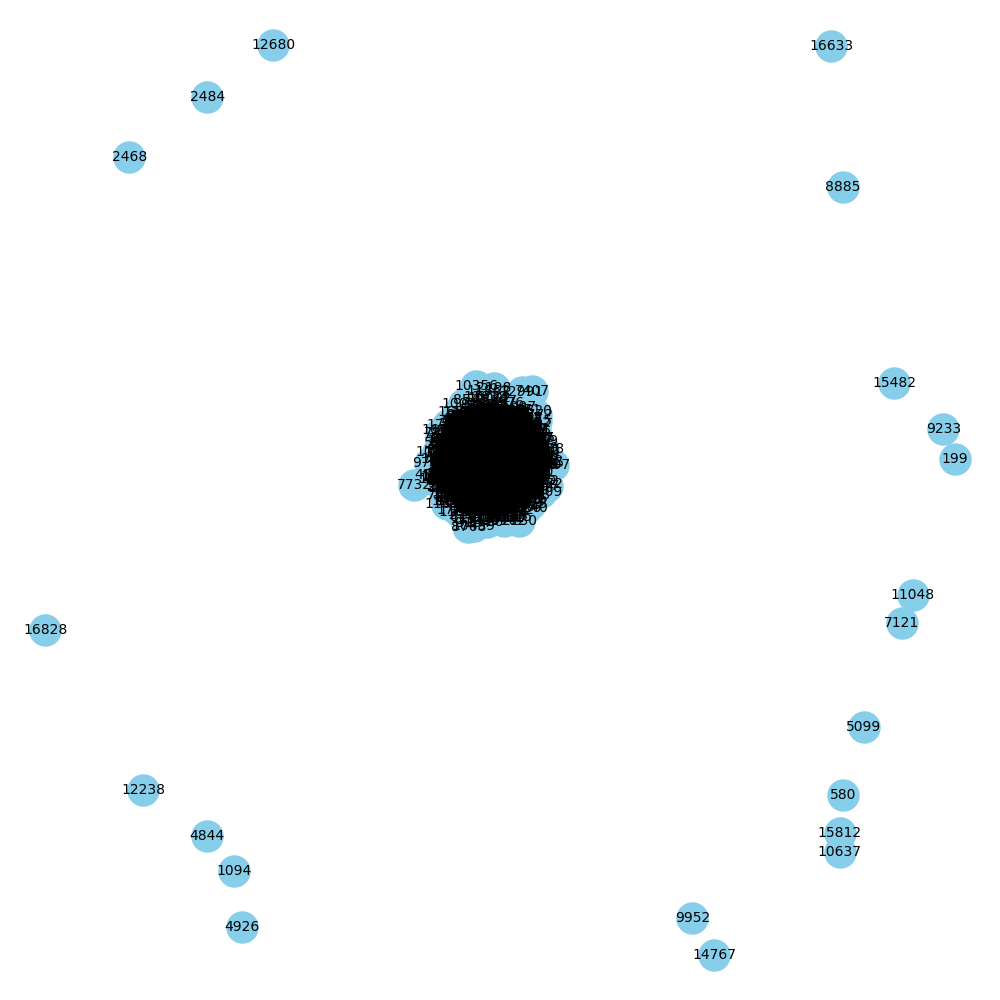

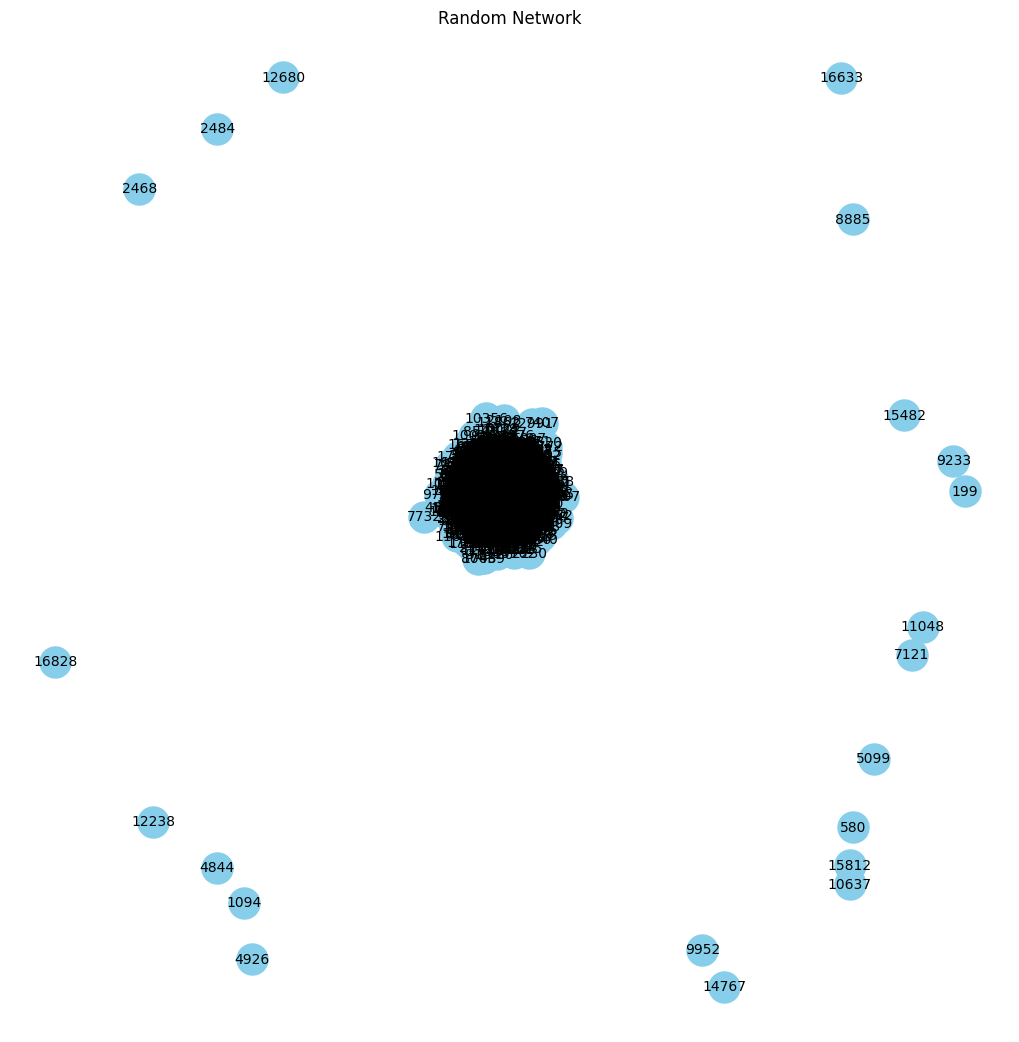

In [16]:
# Check if 'random-network.png' exists in the current directory
if not os.path.isfile('networks/random-network.png'):
    # Generate a random network with the same number of nodes and probability p
    G_rnd = random_network(N, p) #nx.erdos_renyi_graph(N, p)

    # Visualize the random network
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G_rnd)
    nx.draw(G_rnd, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
    plt.title("Random Network")
    plt.savefig('networks/random-network.png')

# Display the existing image in Jupyter
display(Image(filename='networks/random-network.png'))

And for good measure, we visualize the actual network as well:

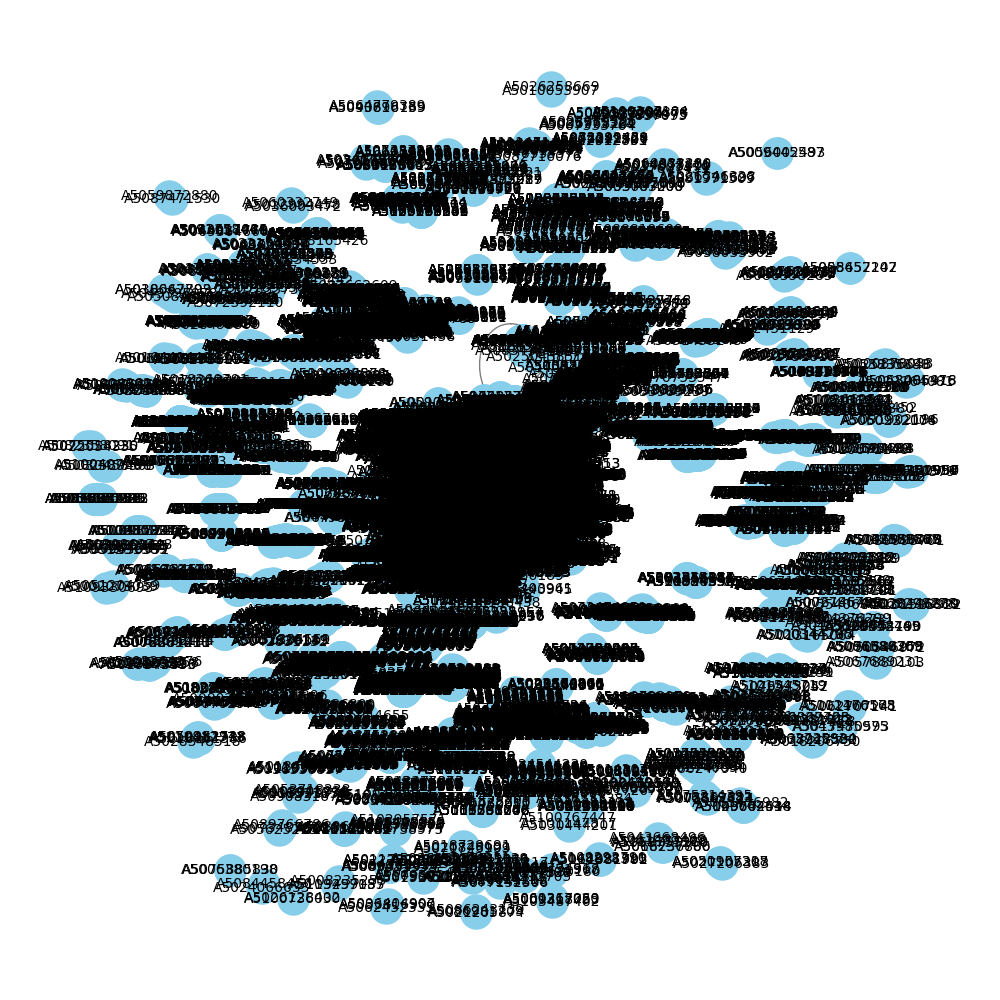

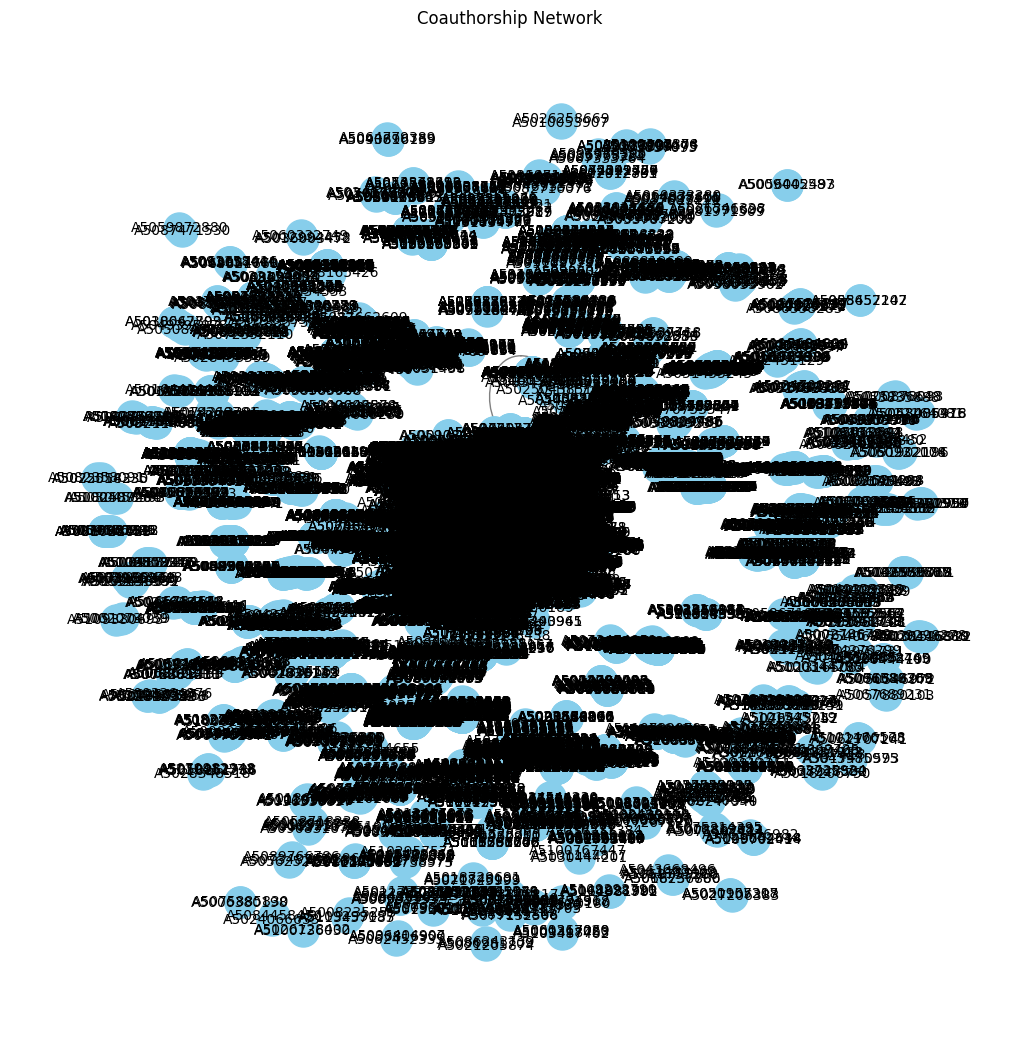

In [17]:
if not os.path.isfile('networks/coauthorship-network.png'):
    # Visualize coauthorship random network
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
    plt.title("Coauthorship Network")
    plt.savefig('networks/coauthorship-network.png')

# Display the existing image in Jupyter
display(Image(filename='networks/coauthorship-network.png'))

#### Network regime and differences between networks

Based on [Section 3.6](https://networksciencebook.com/chapter/3#evolution-network), we can create a function to determine the type of regime that a network is part of, using $p$ and $\langle k \rangle$:

In [18]:
def network_regime(G):
    # Calculate probability and expected/average degree
    N = G.number_of_nodes()
    L = G.number_of_edges()
    p = (2 * L) / (N * (N-1))
    avg_k = p * (N-1)

    if (0 < avg_k) and (p < 1/N):
        print("Subcritical Regime")
    elif (avg_k == 1) and (p == 1/N):
        print("Critical Point")
    elif (avg_k > 1) and (p > 1/N):
        print("Supercritical Regime")
    elif (avg_k > np.log(N)) and (p > np.log(N)/N):
        print("Connected Regime")
    else:
        raise "(!) Network regime undefined"

network_regime(G_rnd)

Supercritical Regime


and here we find that the random network is a supercritical regime, which means it's above the critical point ($\langle k \rangle > 1$), which means that the network does have a giant component with isolated components around it.

In [19]:
nx.number_connected_components(G), nx.number_connected_components(G_rnd)

(271, 22)

In [20]:
largest_cc, largest_cc_rnd = max(nx.connected_components(G), key=len), max(nx.connected_components(G_rnd), key=len)
print(len(largest_cc), len(largest_cc_rnd))

14483 17859



They main differences between the actual coauthorship network and the randomly parameterized/generated network is that the giant component is larger (contains more nodes) in the random network as opposed to the actual network. In other words, the coauthorship network has more isolated components or subgraphs than the random network, despite them having approximately the same $\langle k \rangle$.

In [21]:
# Coauthorship network
node_degree = pd.DataFrame.from_dict(G.degree)
node_degree.columns = ["id", "degree"]
print(node_degree["degree"].describe()["std"])

10.753483824265507


In [22]:
# Random network
node_degree = pd.DataFrame.from_dict(G_rnd.degree)
node_degree.columns = ["id", "degree"]
print(node_degree["degree"].describe()["std"])

2.5382548833060037


The standard deviation is also much larger in the coauthorship graph at 10.75, which is a far cry from 2.53 in the random network.

Conclusively, we can hereby confirm that this real network is also not random as expected by the theory. There is a clear order to be found in the network, which is the collaboration/relationship between authors. Still not convinced? Just generate a number of random networks and average their metrics to see that this is indeed true.

### 1.1.2: Shortest Paths

#### Largest connected component (giant component)

First, construct the subgraph containing all the nodes in the giant component:

In [23]:
# Get connected components
connected_components = nx.algorithms.connected_components(G)

# Find giant component
giant_component = max(connected_components, key=len)

# Construct subgraph
G_sub = nx.Graph.subgraph(G, giant_component)

#### Shortest path length

To get the average shortest path between all pairs of nodes in the subgraph, sample a pairs of nodes and calculate the path length between those, as the `nx.average_shortest_path_length` took too long at complexity $O(N^3)$. Note that what we get here is an approximation, a sample mean:

In [24]:
def avg_shortest_path_length(G, n_samples=10000):
    nodes = G.nodes()
    lengths = np.zeros(n_samples)

    for i in range(n_samples):
        n1, n2 = np.random.choice(list(nodes), size=2)
        length = nx.shortest_path_length(G, source=n1, target=n2)
        lengths[i] = length
    
    return float(np.mean(lengths))

avg_shortest_path = avg_shortest_path_length(G_sub)

avg_shortest_path

5.6716

Alternatively, we can approximate the average distance between any two nodes using Equation 3.18 from [Section 3.8](https://networksciencebook.com/chapter/3#small-worlds):

In [25]:
d_max = np.log(N)/np.log(avg_k)

float(d_max)

5.259845032916803

#### Shortest paths in random network

Carry out the same for the random network:

In [26]:
# Get connected components
cc_rnd = nx.algorithms.connected_components(G_rnd)

# Find giant component
gc_rnd = max(cc_rnd, key=len)

# Construct subgraph
G_sub_rnd = nx.Graph.subgraph(G_rnd, gc_rnd)

avg_shortest_path_rnd = avg_shortest_path_length(G_sub_rnd)

avg_shortest_path_rnd

5.4533

#### Comparing networks

To show the small-world phenomenon in action, we require a fully connected graph. The most representative fully connected graph in a supercritical regime is the giant component. This is why we consider only the giant component of both networks. For the coauthership network we get an approximated average shortest path of $d_{\max} = 5.2598$, which is less than 6. So yes, to conclude, the network does exhibit the small-world phenomenon.

Additionally, the random network approximate is relatively close to the coauthership approximate, and is also below 6, which implies small-world phenomenon.

## Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6: __Exercise 1: Mixing Patterns and Assortativity__ and __Exercise 3: Zachary's karate club__.

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**
>
> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.
> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.
>
>
> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.
>


### 2.1.1: Assortativity Coefficient

In [55]:
def read_json_graph(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return nx.readwrite.json_graph.node_link_graph(js_graph)

# Import graph
G = read_json_graph("coauthorship_network.json")

# Extract country attributes for each node
countries = nx.get_node_attributes(G, "country")

# Get unique countries and create an index mapping
unique_countries = list(set(countries.values()))
country_to_index = {country: i for i, country in enumerate(unique_countries)}

country_to_index

/Users/glymov/DTU/4 Semester/Social/social_env/lib/python3.13/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


{'EE': 0,
 'BN': 1,
 'KW': 2,
 'RS': 3,
 'LK': 4,
 'SA': 5,
 'GB': 6,
 'CZ': 7,
 'UG': 8,
 'RU': 9,
 'SE': 10,
 'KY': 11,
 'TD': 12,
 'IR': 13,
 'DK': 14,
 'UY': 15,
 'BR': 16,
 'ID': 17,
 'SG': 18,
 'TW': 19,
 'MW': 20,
 'SI': 21,
 'GR': 22,
 'MX': 23,
 'FR': 24,
 'PR': 25,
 'PL': 26,
 nan: 27,
 'KR': 28,
 'AR': 29,
 'CO': 30,
 'AU': 31,
 'CL': 32,
 'RO': 33,
 'ES': 34,
 'FI': 35,
 'IS': 36,
 'MY': 37,
 'IQ': 38,
 'BE': 39,
 'PT': 40,
 'QA': 41,
 'NP': 42,
 'CR': 43,
 'MA': 44,
 'NO': 45,
 'TR': 46,
 'LU': 47,
 'IT': 48,
 'BD': 49,
 'SL': 50,
 'NL': 51,
 'TH': 52,
 'ST': 53,
 'KE': 54,
 'CA': 55,
 'MN': 56,
 'EG': 57,
 'AT': 58,
 'US': 59,
 'HU': 60,
 'HR': 61,
 'GH': 62,
 'NG': 63,
 'JP': 64,
 'MO': 65,
 'JO': 66,
 'IN': 67,
 'DE': 68,
 'VE': 69,
 'NE': 70,
 'PK': 71,
 'CN': 72,
 'CH': 73,
 'SO': 74,
 'MK': 75,
 'EC': 76,
 'AE': 77,
 'ZA': 78,
 'IE': 79,
 'LT': 80,
 'NZ': 81,
 'PH': 82,
 'HK': 83,
 'ET': 84,
 'CY': 85,
 'JM': 86,
 'IL': 87,
 'BA': 88}

Here we have "numericalized" each country code, which makes it fast and easy to map them back later on.

Based on this we can create the so-called mixing matrix $\mathbf{e}$ and populate its entries:

In [28]:
# Initialize mixing matrix
k = len(unique_countries)  # number of unique countries
e = np.zeros((k, k)) # pre-define mixing matrix dimensions

# Edges/links
L = G.number_of_edges()

# Populate the mixing matrix
for u, v in G.edges():
    if u in countries and v in countries:
        i = country_to_index[countries[u]]
        j = country_to_index[countries[v]]

        # Update "affected" entries
        e[i, j] += 1
        e[j, i] += 1

# Normalize to get probabilities
e /= (2 * L)

# Compute row and column sums
a = np.sum(e, axis=1)  # Sum over rows
b = np.sum(e, axis=0)  # Sum over columns

# Compute assortativity coefficient
trace_e = np.trace(e)  # Sum of diagonal elements
sum_ab = np.sum(a * b)  # Sum of a_i * b_i

r = (trace_e - sum_ab) / (1 - sum_ab)

print(r)

0.5039272848341674


And for good measure, to compare with the `networkx` implementation:

In [29]:
nx.attribute_assortativity_coefficient(G, attribute="country")

0.5039107856755011

We do note, however, that there are a lot of NaN values (nodes with unassigned country codes), which may affect the "quality" of this metric.

### 2.1.2: Configuration Model, edge swap

From lecture 8, our teacher said it was possible to do an improved version of double edge swap, where instead of randomly choosing 2 edges from the graph $G$ also as proposed in the assigment, it would be possible to randomly choose 2 nodes, and then do the swapping. This method aligns with what networkx also does in their version avaible at their source code. 

We took heavy inspiration of method from networkx, but implemented it our own way using random and numpy
> 1. Create a distribution over the nodes using a CDF, where we weight all the nodes with their degrees. What it essentially means is that nodes with more connections (higher degree) are more likely to be chosen. Nodes with fewer connections are more likely to fail a swap, since they have fewer connections. So if we in the assignment draw from a uniform distrubution of edges, theres a chance for a bad connected edges. This is fixed by making a distrbtion of nodes instead with higher chance of getting better connected nodes. 

> 2. The for loop tries to swap two edges. Some swaps are rejected if they violate certain conditions. (step d). But also if v == y, which creates a self loop. Note: Theres a 50 % chance for a flip

> 3. Due to time constraints, we define a swap as a try, that means if a swap fails, it counts as a swap.  Some nodes are easier to swap than other (ones with higher degrees), so given a very bad graph, then it can take a very long time to actually perform the $E * 10$ swaps. **This approach might be too greedy, but the evaluation of the random graph, shows its feasible**


In [ ]:
import time
import random
import networkx as nx
import numpy as np


In [ ]:

def double_edge_swap(G):
    #we make an new seed for each function call, in ordrer to make the histogram
    random.seed(int(time.time() * 1000) % (2**32))

    G_new = G.copy()
    nodes = list(G_new.nodes())

    E = len(G.edges())
    # Number of swaps to perform
    num_swaps = E * 10  
    attempts = 0
    
    # Avoid too many attempts, very greedy
    max_attempts = num_swaps + 1000 

    degrees = dict(G_new.degree())
    weights = np.array([degrees[n] for n in nodes])
    # Compute cumulative distribution of nodes with degrees
    cdf = np.cumsum(weights) / np.sum(weights)  

    def sample_node():
        return nodes[np.searchsorted(cdf, random.random())]


    while attempts < max_attempts:
        attempts += 1

        # Pick two random nodes based on degree distribution
        u, x = sample_node(), sample_node()
        if u == x:
            continue  

        neighbors_u = list(G_new[u])
        neighbors_x = list(G_new[x])

        # Ensure they have neighbors
        if not neighbors_u or not neighbors_x:
            continue  

        v = random.choice(neighbors_u)
        y = random.choice(neighbors_x)

        # Flip the direction of (u, v) 50% of the time
        if random.random() < 0.5:
            u, v = v, u
        if random.random() < 0.5:
            x, y = y, x

        # Avoid self-loops or duplicate edges
        if v == y or u == y or x == v:
            continue

        if G_new.has_edge(u, y) or G_new.has_edge(x, v):
            continue

        # Ensure edges exist before removing (redundant but safe)
        if not G_new.has_edge(u, v) or not G_new.has_edge(x, y):
            continue

        # Perform the swap
        G_new.remove_edge(u, v)
        G_new.remove_edge(x, y)
        G_new.add_edge(u, y)
        G_new.add_edge(x, v)

    return G_new


In [10]:

G_new = double_edge_swap(G.copy())
# Verify degree sequence preservation, first we sort the dict's and compare if each nodes degree is equal to the new
print("Degree sequence preserved:", sorted(dict(G.degree()).values()) == sorted(dict(G_new.degree()).values()))

# Check assortativity
print("Original assortativity:", nx.degree_assortativity_coefficient(G))
print("Randomized assortativity:", nx.degree_assortativity_coefficient(G_new))


Degree sequence preserved: True
Original assortativity: -0.10517538713960162
Randomized assortativity: -0.02001824643476846


The original graph is somewhat disassortative (-0.105), that essentially means high-degree nodes tend to connect with low-degree nodes. 
After randomization, degree assortativity moves closer to neutral (-0.020),that indicates that degree correlations have been weakened but are still a little bit disassortative (higher swapping could converge this to 0). This shows that the edge swap process disrupts a distribution of connections theres in the original, while preserving degree distribution.

### 2.1.3: Analyzing Assortativity in Random Networks

Here we will just use `networkx`'s built-in assortativity coefficient method:

In [359]:
E = G.number_of_edges()

# predefine a pandas dataframe
df = pd.DataFrame(index=range(100), columns=['swapped_graph', 'assortativity_coefficient'])

# Function to perform double edge swap and calculate assortativity coefficient
def swap_and_calculate_assortativity(row):
    G_swapped = double_edge_swap(G.copy())
    assortativity = nx.attribute_assortativity_coefficient(G_swapped, attribute="country")
    return pd.Series([G_swapped, assortativity])

# Apply the function to each row
df[['swapped_graph', 'assortativity_coefficient']] = df.apply(swap_and_calculate_assortativity, axis=1)

In [362]:
df["assortativity_coefficient"].describe()

count    100.000000
mean      -0.000025
std        0.001653
min       -0.003880
25%       -0.001122
50%       -0.000112
75%        0.001057
max        0.004336
Name: assortativity_coefficient, dtype: float64

<Axes: >

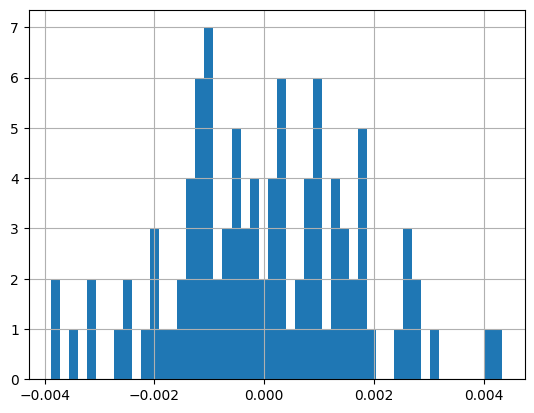

In [363]:
df["assortativity_coefficient"].hist(bins=50)

In [364]:
nx.attribute_assortativity_coefficient(df.iloc[0]["swapped_graph"], attribute="country")

-0.001110873344591243

In [365]:
df.iloc[0]["swapped_graph"].nodes()['A5014647140']

{'name': 'Aaron Clauset',
 'country': nan,
 'first_publication': 2004,
 'total_citations': 20587}

### 2.2.1: Zachary's Karate Club

> __Exercise 2: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html)
>
> 1. Visualize the graph. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.
>
> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.
> 3. Explain in your own words the concept of _modularity_.
> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.
> 5. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in the exercise above 5. For each of them, compute the modularity of the "club" split and store it in a list.
> 6. Compute the average and standard deviation of the modularity for the random network.
> 7. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)).
> 8. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?
> 9.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?
> 10.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

#### Visualize the graph

To visualize the club split, we need to know which master/mentor the students are assigned. We can gather this info by looking at the node data.

In [11]:
# Import the graph
G_karate_club = nx.karate_club_graph()

# Get club attributes
club_dict = nx.get_node_attributes(G_karate_club, "club")

# Get unique club names and assign colors dynamically
unique_attributes = list(set(club_dict.values()))  # Unique club names

# Assign a number to each unique value
attribute_to_number = {attribute: i for i, attribute in enumerate(unique_attributes)}

# Map the club_dict to numbers (we save this for later when partitioning)
karate_club_partition = {k: attribute_to_number[v] for k, v in club_dict.items()}

display(unique_attributes)

['Officer', 'Mr. Hi']

So each node is either assigned to `club` attribute `Mr. Hi` or `Officer`. We color based on this:

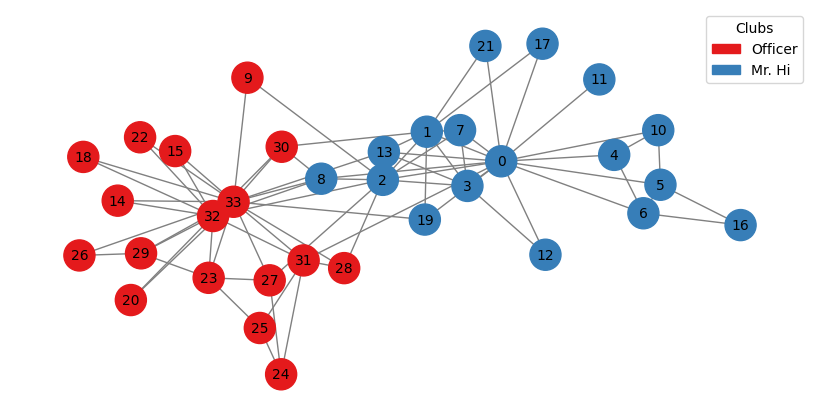

In [12]:
color_map = {club: idx for idx, club in enumerate(unique_attributes)}  # Assign an index to each club

# Generate colors based on indices
node_colors = [color_map[club_dict[node]] for node in G_karate_club.nodes]

# Choose a colormap (Set1 gives distinct colors)
cmap = plt.cm.Set1  
colors = [cmap(i) for i in range(len(unique_attributes))]  # Generate unique colors

# Map each club to a specific color
club_color_map = {club: colors[idx] for idx, club in enumerate(unique_attributes)}
node_colors = [club_color_map[club_dict[node]] for node in G_karate_club.nodes]

# Draw the graph
plt.figure(figsize=(8, 4))
nx.draw(
    G_karate_club, 
    with_labels=True, 
    node_color=node_colors, 
    edge_color="gray", 
    node_size=500, 
    font_size=10
)

# Create legend
legend_patches = [mpatches.Patch(color=color, label=club) for club, color in club_color_map.items()]
plt.legend(
    handles=legend_patches,
    title="Clubs",
    loc="upper right"
)

# Show the plot
plt.show()

In [13]:
color_map

{'Officer': 0, 'Mr. Hi': 1}

In [14]:
club_dict.update(color_map)

club_dict

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer',
 'Officer': 0,
 'Mr. Hi': 1}

We note that the links/edges represent the interactions between club members outside of the club ([source](https://networksciencebook.com/chapter/9#introduction9)).

#### Graph partitioning and modularity

From the book, we have [Equation 9.12](https://networksciencebook.com/chapter/9#modularity), which defines a partition's (a set of communities') modularity:
$$
M = \sum^{n_c}_{c=1} \left[ M_c \right] = \sum^{n_c}_{c=1} \left[ \frac{L_c}{L} - \left( \frac{k_c}{2L} \right)^2 \right]
$$
where:
- $M$ is the modularity of a partition
- $M_c$ is the modularity for a community in the partition
    - If this is positive, then $C_c$ is likely a true/real community
- $n_c$ is the number of communities
- $c$ is a specific community's index and $c = 1, \dots, n_c$
- $L_c$ is the total number of links within community $C_c$
- $L$ is the total number of links in the full network
- $k_c$ is the total degree of nodes in community $C_c$

We now define a function to compute the modularity of a graph partitioning:

In [15]:
def partition_modularity(G, partition):
    if isinstance(partition, dict):
        # Convert partition_dict to a list of sets (modified to work with louvain)
        partition = [{k for k, v in partition.items() if v == value} for value in set(partition.values())]

    # Check if parition is a partition of G
    assert nx.algorithms.community.community_utils.is_partition(G, partition), "The partition is not a community within the graph"

    # Compute network parameters
    L = G.number_of_edges()

    # Calculate modularity
    M = 0

    for p in partition:
        # Make a subgraph of G using partition P
        P_graph = G.subgraph(p)

        # Compute partition parameters
        L_c = P_graph.number_of_edges()
        k_c = sum(dict(P_graph.degree()).values())

        M += L_c/L - (k_c/(2*L))**2

    return M

#### Concept of modularity

Modularity $M$ measures the quality of network partitions by comparing the actual link density $L_c$ within communities to the expected random link density $\left( \frac{k_c}{2L} \right)^2$, which reveals communities.

The formula describing $M$ helps determine if a network's partition into communities is better than some random configuration.

#### Modularity of the karate club

To test the function, we can use a partition of communities (sets of nodes) from the split in the karate club:

In [16]:
mr_hi_nodes = {key for key, val in club_dict.items() if val == "Mr. Hi"}
officer_nodes = {key for key, val in club_dict.items() if val == "Officer"}

communities = [mr_hi_nodes, officer_nodes]

karate_club_modularity = partition_modularity(G_karate_club, communities)

karate_club_modularity

0.48931623931623935

#### Randomized karate clubs

In [17]:
E = G_karate_club.number_of_edges()

df_rnd_clubs = pd.DataFrame(
    index=range(1000),
    columns=['club', 'modularity']
)

def swap_and_modularity(row):
    #G_swapped = nx.double_edge_swap(G_karate_club.copy(), nswap=E*10, max_tries=E*10*10)
    G_swapped = double_edge_swap(G_karate_club.copy())
    club_dict = nx.get_node_attributes(G_swapped, "club")
    mr_hi_nodes = {key for key, val in club_dict.items() if val == "Mr. Hi"}
    officer_nodes = {key for key, val in club_dict.items() if val == "Officer"}
    communities = [mr_hi_nodes, officer_nodes]

    modularity = partition_modularity(G_swapped, communities)

    return pd.Series([G_swapped, modularity])

df_rnd_clubs[['club', 'modularity']] = df_rnd_clubs.apply(swap_and_modularity, axis=1)

df_rnd_clubs

,club,modularity
0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.347304
1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.361111
2,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.374260
3,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.374260
4,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.361111
...,...,...
995,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.361111
996,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.332840
997,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.361111
998,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.332840


#### Randomized clubs' statistics

In [18]:
df_rnd_clubs["modularity"].describe()

count    1000.000000
mean        0.363696
std         0.024536
min         0.268409
25%         0.347304
50%         0.361111
75%         0.386752
max         0.430145
Name: modularity, dtype: float64

#### Modularity distribution

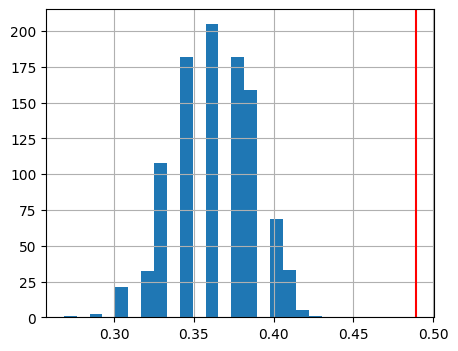

In [19]:
plt.figure(figsize=(5, 4))
df_rnd_clubs["modularity"].hist(bins=20)
plt.axvline(karate_club_modularity, color="red")
plt.show()

In [21]:
rnd_mean = df_rnd_clubs["modularity"].describe()["mean"]
rnd_max = df_rnd_clubs["modularity"].describe()["max"]
rnd_std = df_rnd_clubs["modularity"].describe()["std"]

print(
    (karate_club_modularity - rnd_mean)/rnd_std,
    (karate_club_modularity - rnd_max)/rnd_std,
)

5.1197585696869075 2.41159310440169


Observe that the true karate club modularity is 5 standard deviations greater than the averaged mean modularity of the random distribution and around 2 standard deviations greater than the averaged max modularity, also from the random distribution.

The club split is a good partitioning, as it indicates true community splits, and the randomization experiment, as explained through the metrics above, goes to show that real graphs/subgraphs/communities are not randomized.

The preservation of node degrees is done to ensure that the randomized graphs "model" the real graph's degree distribution, which heavily influences the modularity metric through $k_c$. By keeping it the same, we can make an actual fair comparison, and lay off any confounding variables wrt. the degree.

#### Louvain-algorithm

/var/folders/g2/nqbvvhd15wj3965qksg_rxkh0000gn/T/ipykernel_93196/3878229880.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
/var/folders/g2/nqbvvhd15wj3965qksg_rxkh0000gn/T/ipykernel_93196/3878229880.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=cmap(cls), label=f'{cls}')


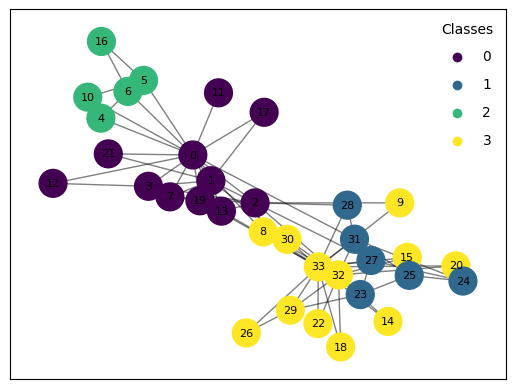

In [31]:
# Compute the best partition using the Louvain algorithm
partition = community_louvain.best_partition(G_karate_club)

# Draw the graph
pos = nx.spring_layout(G_karate_club)

# Color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(
    G_karate_club,
    pos,
    partition.keys(),
    node_size=400,
    cmap=cmap,
    node_color=list(partition.values())
)
nx.draw_networkx_edges(
    G_karate_club,
    pos,
    alpha=0.5
)

# Add labels to nodes
nx.draw_networkx_labels(G_karate_club, pos, font_size=8)

# Create a legend for the classes
unique_classes = set(partition.values())
for cls in unique_classes:
    plt.scatter([], [], c=cmap(cls), label=f'{cls}')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Classes')

plt.show()

We calculate the modularity:

In [32]:
partition_modularity(G_karate_club, partition=partition)

0.5573635765943459

This is higher than what we initially had using just the club partitions, which indicates that the "ideal" community structure may not be found by just paritioning according to which clubs the students are in, at least according to the modularity metric.

#### Confusion matrix

Confusion Matrix (D):
[[11  0  5  1]
 [ 0  6  0 11]]


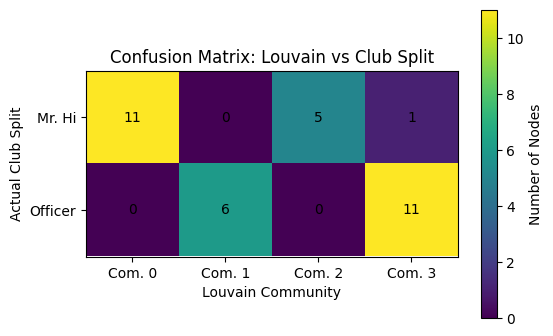

In [42]:


# Get the original club split
club_mapping = {node: 0 if G_karate_club.nodes[node]['club'] == 'Mr. Hi' else 1 for node in G_karate_club.nodes()}
club_labels = list(club_mapping.values())

# Extract the detected communities
louvain_labels = list(partition.values())

# Get number of unique communities found by Louvain
num_communities = len(set(louvain_labels))

# Create confusion matrix D (2 x num_communities)
D = np.zeros((2, num_communities), dtype=int)

# Populate the confusion matrix
for node in G_karate_club.nodes():
    true_label = club_mapping[node]  # Club membership
    pred_label = partition[node]  # Louvain community
    D[true_label, pred_label] += 1

# Print confusion matrix
print("Confusion Matrix (D):")
print(D)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(D, interpolation='nearest')
plt.colorbar(label='Number of Nodes')

# Add text labels
for i in range(2):
    for j in range(num_communities):
        plt.text(j, i, str(D[i, j]), ha='center', va='center', color='black')

plt.xticks(range(num_communities), [f'Com. {i}' for i in range(num_communities)])
plt.yticks([0, 1], ['Mr. Hi', 'Officer'])
plt.xlabel("Louvain Community")
plt.ylabel("Actual Club Split")
plt.title("Confusion Matrix: Louvain vs Club Split")
plt.show()

Community 0 primarily consists of Mr. Hi's members (N = 11) and no Officers N = 0, while Community 1 mainly includes Officer's members (N = 6) with no Mr. Hi members (N = 0).  

This indicates that Louvain successfully identified the original groups to some extent.  

However, the original network had only two communities, whereas Louvain divided it into 4. Specifically, Communities 2 and 3 contained 5 and 11 nodes, respectively, leadning to an over "categorizing" of the network.


## Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)
>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?
> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).
> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 
>   * Describe similarities and differences between the communities.
>   * Why aren't the TFs not necessarily a good description of the communities?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?
> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?



#### Prerequisites: Tokenized abstract dataframe & Author degree and community dataframe

> Tokenized abstract dataframe

In [599]:
# Load abstracts dataframe
abstracts_df = pd.read_json("abstracts.json")

In [600]:
df_articles = pd.read_csv("df_articles.csv")

# Fix string as list\n",
df_articles["author_ids"] = df_articles["author_ids"].apply(lambda x: x[1:-1].split(','))

To clean up the data and keep things nice and tidy, we first store make sure that there are no undefined rows/entries across the two relevant dataframes. To avoid having to work with multiple dataframes, we store all relevant info in a single dataframe. Finally, we remove any undefined (`NaN` or `None`) rows/entries:

In [601]:
# Step 1: Keep only entries in abstracts_df where 'id' is also in df_articles
abstracts_df = abstracts_df[abstracts_df["id"].isin(df_articles["id"])]

# Step 2: Merge df_articles into abstracts_df to add 'author_ids'
abstracts_df = abstracts_df.merge(df_articles[["id", "author_ids"]], on="id", how="left")

# Step 3: Remove entries where 'abstract_inverted_index' is NaN or None
abstracts_df = abstracts_df[abstracts_df["abstract_inverted_index"].notna()]

abstracts_df = abstracts_df.reset_index(drop=True)

To know the length of each abstract, we can collect the max index and pre-allocate an array with empty strings to speed things up. We can use the `map` method to "vectorize" operations:

In [602]:
from numpy.dtypes import StringDType

In [603]:
def construct_abstract(abs_inv_idx):
    if not abs_inv_idx:
        return ""

    # Get max index for correct allocation
    max_idx = max(max(i) for i in abs_inv_idx.values())

    # Pre-allocate an array with empty strings (NumPy for efficiency)
    word_list = np.full(max_idx + 1, "", dtype=StringDType())

    # Vectorized-like word placement (avoiding Python loops where possible)
    for word, positions in abs_inv_idx.items():
        word_list[positions] = word  # Direct NumPy assignment

    return " ".join(word_list)

# Apply function to dataframe (Pandas vectorized apply)
abstracts_df["text"] = abstracts_df["abstract_inverted_index"].map(construct_abstract)

abstracts_df.head()

,id,title,abstract_inverted_index,author_ids,text
0,https://openalex.org/W3103362336,Power-Law Distributions in Empirical Data,"{'Power-law': [0], 'distributions': [1], 'occu...","['A5014647140', 'A5082953212', 'A5067142016']",Power-law distributions occur in many situatio...
1,https://openalex.org/W2047940964,Finding community structure in very large netw...,"{'The': [0, 147], 'discovery': [1], 'and': [2,...","['A5014647140', 'A5067142016', 'A5008033989']",The discovery and analysis of community struct...
2,https://openalex.org/W2018045523,Hierarchical Organization of Modularity in Met...,"{'Spatially': [0], 'or': [1], 'chemically': [2...","['A5007285525', 'A5067021466', 'A5029755266'...",Spatially or chemically isolated functional mo...
3,https://openalex.org/W2119298903,Evaluating Online Labor Markets for Experiment...,"{'We': [0, 16, 32, 57, 69], 'examine': [1], 't...","['A5054913386', 'A5065660380', 'A5065503150']",We examine the trade-offs associated with usin...
4,https://openalex.org/W1987228002,Limits of Predictability in Human Mobility,"{'Predictable': [0], 'Travel': [1], 'Routines'...","['A5100744117', 'A5080830598', 'A5022334515'...",Predictable Travel Routines While people rarel...


Then we tokenize the abstracts dataframe, again using a dedicated function. We also utilize a combined pattern with the OR operator to be able to make only a single method/function call for the text substitution:

In [604]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK resources
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /Users/glymov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/glymov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/glymov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [605]:

# Initialize the Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords set
stopwords_set = set(stopwords.words("english"))

# Regex patterns
regex_punctuation = r"[^\w\s]|_"  # punctuation (any character that's not a letter, number or whitespace)
regex_url = r"https?://\S+|www\.\S+"  # for URLs
regex_math = r"[+\-*/=<>×÷∑∞∂πθ√∫≈≠]"  # for math symbols and operators
regex_numbers = r"\d+(\.\d+)?"  # numbers including letters combined with numbers

# Combine pattern with the OR operator "|"
pattern = re.compile(r"|".join([regex_punctuation, regex_url, regex_math, regex_numbers]))

def tokenization(text):
    # Apply regex substitutions once
    text = pattern.sub("", text).lower()
    
    # Tokenize the text efficiently
    tokens = nltk.word_tokenize(text)
    
    # Filter stopwords and apply lemmatization
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]

# Apply tokenization algorithm to new column
abstracts_df["tokens"] = abstracts_df["text"].apply(tokenization)

# Display the first few rows of the dataframe
abstracts_df.head()


,id,title,abstract_inverted_index,author_ids,text,tokens
0,https://openalex.org/W3103362336,Power-Law Distributions in Empirical Data,"{'Power-law': [0], 'distributions': [1], 'occu...","['A5014647140', 'A5082953212', 'A5067142016']",Power-law distributions occur in many situatio...,"[powerlaw, distribution, occur, many, situatio..."
1,https://openalex.org/W2047940964,Finding community structure in very large netw...,"{'The': [0, 147], 'discovery': [1], 'and': [2,...","['A5014647140', 'A5067142016', 'A5008033989']",The discovery and analysis of community struct...,"[discovery, analysis, community, structure, ne..."
2,https://openalex.org/W2018045523,Hierarchical Organization of Modularity in Met...,"{'Spatially': [0], 'or': [1], 'chemically': [2...","['A5007285525', 'A5067021466', 'A5029755266'...",Spatially or chemically isolated functional mo...,"[spatially, chemically, isolated, functional, ..."
3,https://openalex.org/W2119298903,Evaluating Online Labor Markets for Experiment...,"{'We': [0, 16, 32, 57, 69], 'examine': [1], 't...","['A5054913386', 'A5065660380', 'A5065503150']",We examine the trade-offs associated with usin...,"[examine, tradeoff, associated, using, amazonc..."
4,https://openalex.org/W1987228002,Limits of Predictability in Human Mobility,"{'Predictable': [0], 'Travel': [1], 'Routines'...","['A5100744117', 'A5080830598', 'A5022334515'...",Predictable Travel Routines While people rarel...,"[predictable, travel, routine, people, rarely,..."


> degree of each author

In [606]:
# Import the graph\n",
G = read_json_graph("coauthorship_network_no_nan.json")

# Print total number of authors
print(f"Total number of authors: {G.number_of_nodes()}")

Total number of authors: 17880


/Users/glymov/DTU/4 Semester/Social/social_env/lib/python3.13/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


In [607]:
# Compute the best partition using the Louvain algorithm
partition = community_louvain.best_partition(G)

print(f"Number of communities found by the Louvain algorithm: {len(set(partition.values()))}")

Number of communities found by the Louvain algorithm: 340


In [608]:
partition_modularity(G, partition)

0.9171969122016587

In a dataframe, we now store the relevant data for each author entry, that is `degree` and `community` for each `author`:

In [609]:
G_degree = dict(G.degree())
G_community = partition

df_author_deg_com = pd.DataFrame({
    "author": list(G_degree.keys()),
    "degree": list(G_degree.values()),
    "community": list(G_community.values()),
})

df_author_deg_com.head()

,author,degree,community
0,A5014647140,41,0
1,A5082953212,3,0
2,A5067142016,4,0
3,A5008033989,18,0
4,A5007285525,7,1


#### 1. Explain TF - IDF terms

- **TF:** Term frequency, calculates the relative frequency of some term $t$ within a document $d$: $$\mathrm{tf}(t, d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}} = \frac{\text{count of term } t \text{ in document } d}{\text{total number of terms in document } d}$$
- **IDF:** Inverse document frequency, a measure rare a term $t$ is across all documents in a corpus $D$: $$\mathrm{idf}(t, D) = \log\left(\frac{N}{| \{ d : d \in D \text{ and } t \in d \} |}\right) = \log\left(\frac{\text{total number of documents in the corpus}}{\text{number of documents where the term appears}}\right)$$
- **TF-IDF:** The term frequency-inverse frequency is then calculated as: $$\text{tf-idf}(t, d, D) = \mathrm{tf}(t, d) \cdot \mathrm{idf}(t, D)$$

All in all, what we get is an NLP statistic that quantifies the importance of a word in a document relative to the corpus of documents.

We note that there are other ways to compute this statistic, but the formulas were included here for an intuitive explanation.

#### 2. Now, we want to find out which words are important for each community

First, df_author_deg_com is used to determine which authors belong to which community.


For each community, find all papers written by its members using abstracts_df['author_ids']

In [610]:
from nltk.tokenize import word_tokenize

# Map authors to their communities
author_to_community = df_author_deg_com.set_index('author')['community'].to_dict()

# Ensure author_ids are lists (handle cases where they might be strings)
abstracts_df['author_ids'] = abstracts_df['author_ids'].apply(
    lambda x: [str(author).strip().strip("'\"") for author in x] if isinstance(x, list) else []
)


This will create `{'A5014647140': 0,
 'A5082953212': 0,
 'A5067142016': 0,
 'A5008033989': 0,
 'A5007285525': 1,
 'A5067021466': 1,`

Since there are multiple authors in each of the ['author_ids], duplicates for each author inside this is created. I.e the explosion function

In [611]:
# Explode the author_ids column so each row corresponds to a single author
exploded_df = abstracts_df.explode('author_ids')
exploded_df.head()

,id,title,abstract_inverted_index,author_ids,text,tokens
0,https://openalex.org/W3103362336,Power-Law Distributions in Empirical Data,"{'Power-law': [0], 'distributions': [1], 'occu...",A5014647140,Power-law distributions occur in many situatio...,"[powerlaw, distribution, occur, many, situatio..."
0,https://openalex.org/W3103362336,Power-Law Distributions in Empirical Data,"{'Power-law': [0], 'distributions': [1], 'occu...",A5082953212,Power-law distributions occur in many situatio...,"[powerlaw, distribution, occur, many, situatio..."
0,https://openalex.org/W3103362336,Power-Law Distributions in Empirical Data,"{'Power-law': [0], 'distributions': [1], 'occu...",A5067142016,Power-law distributions occur in many situatio...,"[powerlaw, distribution, occur, many, situatio..."
1,https://openalex.org/W2047940964,Finding community structure in very large netw...,"{'The': [0, 147], 'discovery': [1], 'and': [2,...",A5014647140,The discovery and analysis of community struct...,"[discovery, analysis, community, structure, ne..."
1,https://openalex.org/W2047940964,Finding community structure in very large netw...,"{'The': [0, 147], 'discovery': [1], 'and': [2,...",A5067142016,The discovery and analysis of community struct...,"[discovery, analysis, community, structure, ne..."


This line creates a new column in the DataFrame that contains the community ID for each author ID, effectively linking each author to their respective community

In [612]:

# Map authors to their communities
exploded_df['community'] = exploded_df['author_ids'].map(author_to_community)
exploded_df.head()



,id,title,abstract_inverted_index,author_ids,text,tokens,community
0,https://openalex.org/W3103362336,Power-Law Distributions in Empirical Data,"{'Power-law': [0], 'distributions': [1], 'occu...",A5014647140,Power-law distributions occur in many situatio...,"[powerlaw, distribution, occur, many, situatio...",0.0
0,https://openalex.org/W3103362336,Power-Law Distributions in Empirical Data,"{'Power-law': [0], 'distributions': [1], 'occu...",A5082953212,Power-law distributions occur in many situatio...,"[powerlaw, distribution, occur, many, situatio...",0.0
0,https://openalex.org/W3103362336,Power-Law Distributions in Empirical Data,"{'Power-law': [0], 'distributions': [1], 'occu...",A5067142016,Power-law distributions occur in many situatio...,"[powerlaw, distribution, occur, many, situatio...",0.0
1,https://openalex.org/W2047940964,Finding community structure in very large netw...,"{'The': [0, 147], 'discovery': [1], 'and': [2,...",A5014647140,The discovery and analysis of community struct...,"[discovery, analysis, community, structure, ne...",0.0
1,https://openalex.org/W2047940964,Finding community structure in very large netw...,"{'The': [0, 147], 'discovery': [1], 'and': [2,...",A5067142016,The discovery and analysis of community struct...,"[discovery, analysis, community, structure, ne...",0.0


Now each of the abstracts have a community given assigned, then each row in this new community_text corresponds to a community, and the text column contains all the concatenated abstract texts for that community.

In [613]:
# Group by 'community' and concatenate 'tokens' in a more efficient way
community_texts = exploded_df.groupby('community')['tokens'].agg(lambda token_lists: ' '.join(sum(token_lists, []))).reset_index()


In [614]:
community_texts

,community,tokens
0,0.0,powerlaw distribution occur many situation sci...
1,1.0,spatially chemically isolated functional modul...
2,2.0,examine tradeoff associated using amazoncom me...
3,3.0,electronic database phone email log currently ...
4,4.0,although widely used practice behavior accurac...
...,...,...
301,332.0,facing increasing demand challenge area chroni...
302,335.0,precision reliability synchronous prediction m...
303,337.0,recent year online retailer also called etaile...
304,338.0,novel class compound containing tetraphenyleth...


We have 306 communties with non empty tokens. The last 33 communties dont have any tokens connected to them

3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the top 5 communities (by number of authors)

To find the top 5 communties measured on count of authors, it is possible by choosing the one with highest author count from the exploded dataframe (remmeber how multiple authors got spread out for one pr row)  and then sort

In [615]:
# Calculate the number of unique authors per community
author_counts_community = exploded_df.groupby('community')['author_ids'].nunique()

# Sort by number of unique authors in descending order and get the top 5 communities
top_5_communities = author_counts_community.sort_values(ascending=False).head(5).index

# Filter community_texts for the top 5 communities
top_communities_df = community_texts[community_texts['community'].isin(top_5_communities)]
top_communities_df


,community,tokens
5,5.0,significance empirical evidence suggests signi...
11,12.0,propose measurement modeling quantitative soci...
14,15.0,investigate usability aesthetic user interface...
16,17.0,countering misinformation reduce belief moment...
27,28.0,user social medium share content without consi...


Calculate TF of the tokens, using the formula
 $$\mathrm{tf}(t, d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}} = \frac{\text{count of term } t \text{ in document } d}{\text{total number of terms in document } d}$$

In [ ]:
from collections import Counter

# Calculate TF and get top terms
def compute_tf(tokens):
    word_counts = Counter(tokens.split()) 
    total_words = sum(word_counts.values())
    return {word: count / total_words for word, count in word_counts.items()}

# Function to get top 5 terms based on TF, sorted by freqncy
def get_top_terms(tf):
    sorted_terms = sorted(tf.items(), key=lambda x: x[1], reverse=True)[:5]
    return [term[0] for term in sorted_terms]

# Calculate TF for each community
top_communities_df['TF'] = top_communities_df['tokens'].apply(compute_tf)

# Extract top 5 terms per comuntity
top_terms = {
    community: get_top_terms(tf)
    for community, tf in zip(top_communities_df['community'], top_communities_df['TF'])
}

# Display results
for community, terms in top_terms.items():
    print(f"Community {community}: {', '.join(terms)}")


Community 5.0: social, user, medium, data, network
Community 12.0: model, network, social, user, data
Community 15.0: task, user, model, study, system
Community 17.0: people, data, information, model, decision
Community 28.0: model, social, user, community, online


/var/folders/g2/nqbvvhd15wj3965qksg_rxkh0000gn/T/ipykernel_93196/98524281.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_communities_df['TF'] = top_communities_df['tokens'].apply(compute_tf)


#### Describe similarities and differences between the communities



 The word "data" appears frequently across multiple communities (5, 12, 17). This suggests that "data" is a commonly used word, 'social' also appears on (5, 12, 28), which also suggest that social is commonly used.  This however dosent tell us anything specific beside its probabily in the field of social science and data science. 

**Overall** its quite hard to actually differencate between the 5 communities. Community 17 seems to be focused on models and systems, unlike the other who focuses on "social","user" and "community". 

**Why aren't the TFs not necessarily a good description of the communities?**

Because TF chooses the words commonly used inside a community, this means that the words chosen become too generic to actually tell what the theme of the community is. Since all communties talk about some kind of data, social, user based scienc, we need to look at the words in terms of all the communties, like the IDF-TF. 

> Calculate the IDF

$$\mathrm{idf}(t, D) = \log\left(\frac{N}{| \{ d : d \in D \text{ and } t \in d \} |}\right) = \log\left(\frac{\text{total number of documents in the corpus}}{\text{number of documents where the term appears}}\right)$$

For the log scale the $log_e$, since math.log() in Python defaults to base e. The choice of logarithm base does not matter, since the term ranking stays the same no matter what log scale one uses. $log_2, log_{10},$ and $log_e$ will only change the magnitude not order

In [617]:
from collections import defaultdict
import math


# Compute document frequency (DF) across all communities

document_frequency = defaultdict(int)
total_communities = len(community_texts)  

# Count how many communities contain each term
for tokens in community_texts['tokens']:
    unique_terms = set(tokens.split())
    for term in unique_terms:
        document_frequency[term] += 1


# Step 2: Compute IDF for all terms
idf = {
    term: math.log(total_communities / (df))
    for term, df in document_frequency.items()
}

len(idf)

41750

Calculate TF-IDF

In [618]:
# Calculate the number of unique authors per community
author_counts_community = exploded_df.groupby('community')['author_ids'].nunique()

# Sort by number of unique authors in descending order and get the top 9 communities
top_9_communities = author_counts_community.sort_values(ascending=False).head(9).index

# Filter community_texts for the top 9 communities
top_communities_df9 = community_texts[community_texts['community'].isin(top_9_communities)]
top_communities_df9


,community,tokens
4,4.0,although widely used practice behavior accurac...
5,5.0,significance empirical evidence suggests signi...
11,12.0,propose measurement modeling quantitative soci...
14,15.0,investigate usability aesthetic user interface...
16,17.0,countering misinformation reduce belief moment...
17,18.0,social scientist rely heavily data collected h...
26,27.0,appropriate task routing assignment important ...
27,28.0,user social medium share content without consi...
30,31.0,data mining dm process involves multiple stage...


In [619]:
from collections import Counter

# Step 3: Calculate TF and get top terms
def compute_tf(tokens):
    word_counts = Counter(tokens.split())  # Split string into tokens
    total_words = sum(word_counts.values())
    return {word: count / total_words for word, count in word_counts.items()}

# Function to get top 5 terms based on TF, sorted by frequncy
def get_top_terms(tf):
    sorted_terms = sorted(tf.items(), key=lambda x: x[1], reverse=True)[:10]
    return [term[0] for term in sorted_terms]

# Calculate TF for each community
top_communities_df9['TF'] = top_communities_df9['tokens'].apply(compute_tf)

# Extract top 5 terms per community
top_terms = {
    community: get_top_terms(tf)
    for community, tf in zip(top_communities_df9['community'], top_communities_df9['TF'])
}

# Display results
for community, terms in top_terms.items():
    print(f"Community {community}: {', '.join(terms)}")


Community 4.0: social, data, interaction, network, information, behavior, human, individual, model, study
Community 5.0: social, user, medium, data, network, information, online, model, news, study
Community 12.0: model, network, social, user, data, show, find, study, also, task
Community 15.0: task, user, model, study, system, work, team, data, search, information
Community 17.0: people, data, information, model, decision, misinformation, social, study, result, online
Community 18.0: social, medium, political, data, information, online, result, study, news, user
Community 27.0: user, data, network, mobile, mobility, model, app, social, usage, based
Community 28.0: model, social, user, community, online, task, language, data, use, work
Community 31.0: language, social, user, medium, use, twitter, model, data, study, health


/var/folders/g2/nqbvvhd15wj3965qksg_rxkh0000gn/T/ipykernel_93196/2365350739.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_communities_df9['TF'] = top_communities_df9['tokens'].apply(compute_tf)


In [620]:

# Compute TF-IDF for top communities

def compute_tfidf(tf_dict):
    return {term: tf * idf.get(term, 0) for term, tf in tf_dict.items()}

# Add TF-IDF column to the DataFrame
top_communities_df9['TF-IDF'] = top_communities_df9['TF'].apply(compute_tfidf)

# Display top 5 TF-IDF terms for each community
for _, row in top_communities_df9.iterrows():
    community = row['community']
    sorted_tfidf = sorted(row['TF-IDF'].items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"Community {community} (TF-IDF): {[term[0] for term in sorted_tfidf]}")

Community 4.0 (TF-IDF): ['social', 'interaction', 'personality', 'mobile', 'human', 'behavior', 'phone', 'network', 'city', 'crime']
Community 5.0 (TF-IDF): ['user', 'social', 'bot', 'news', 'misinformation', 'medium', 'online', 'twitter', 'network', 'content']
Community 12.0 (TF-IDF): ['user', 'network', 'social', 'model', 'task', 'online', 'graph', 'find', 'pretraining', 'algorithm']
Community 15.0 (TF-IDF): ['team', 'task', 'user', 'worker', 'crowd', 'visualization', 'search', 'ai', 'online', 'work']
Community 17.0 (TF-IDF): ['misinformation', 'people', 'decision', 'heuristic', 'personalization', 'political', 'news', 'judgment', 'respondent', 'online']
Community 18.0 (TF-IDF): ['political', 'medium', 'news', 'social', 'online', 'misinformation', 'user', 'public', 'voter', 'election']
Community 27.0 (TF-IDF): ['user', 'mobility', 'app', 'mobile', 'offloading', 'usage', 'privacy', 'network', 'apps', 'cellular']
Community 28.0 (TF-IDF): ['troll', 'russian', 'user', 'community', 'online

/var/folders/g2/nqbvvhd15wj3965qksg_rxkh0000gn/T/ipykernel_93196/487133571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_communities_df9['TF-IDF'] = top_communities_df9['TF'].apply(compute_tfidf)


### List the top 3 authors (by degree)

In [621]:
# Now calculate the degree of each author in the graph
degree_dict = dict(G.degree())

# Sort authors by degree (highest degree first) and get the top 3
top_3_authors_by_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]

# Display top 3 authors with the highest degree
for author, degree in top_3_authors_by_degree:
    print(f"Author: {author}, Degree: {degree}")

Author: A5100322712, Degree: 368
Author: A5005421447, Degree: 307
Author: A5077712228, Degree: 279


#### Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?

Yes, they are highly descriptive. There is a clear uniqueness to the words in each community which means its possible to get the grasp of a generel theme. 


In contrast to the TF, which gets words such as network, social, user, words that are highly used.  IDF adjustets word frequency by considering how unique the word is across all communities. That means a word very frequent in one community, but is rare in others has higher probability of getting chosen. This makes its easy to give unique words to each community, instead of just basing on frequncy without the context of the other communities

### 3.2.1: The Wordcloud

 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?


In [622]:
top_communities_df9

,community,tokens,TF,TF-IDF
4,4.0,although widely used practice behavior accurac...,"{'although': 0.0006121472979435677, 'widely': ...","{'although': 0.0006725125439957821, 'widely': ..."
5,5.0,significance empirical evidence suggests signi...,"{'significance': 8.051961994739384e-05, 'empir...","{'significance': 0.00013118582906196898, 'empi..."
11,12.0,propose measurement modeling quantitative soci...,"{'propose': 0.001720977565050151, 'measurement...","{'propose': 0.0017144331748200202, 'measuremen..."
14,15.0,investigate usability aesthetic user interface...,"{'investigate': 0.0006591662506879647, 'usabil...","{'investigate': 0.000724168143281082, 'usabili..."
16,17.0,countering misinformation reduce belief moment...,"{'countering': 6.218202374222724e-05, 'misinfo...","{'countering': 0.00026970151582338825, 'misinf..."
17,18.0,social scientist rely heavily data collected h...,"{'social': 0.009954711532150436, 'scientist': ...","{'social': 0.006900080231797648, 'scientist': ..."
26,27.0,appropriate task routing assignment important ...,"{'appropriate': 0.0001527392580087624, 'task':...","{'appropriate': 0.00022750185577995343, 'task'..."
27,28.0,user social medium share content without consi...,"{'user': 0.006984194788551901, 'social': 0.008...","{'user': 0.00816946998686569, 'social': 0.0055..."
30,31.0,data mining dm process involves multiple stage...,"{'data': 0.007005062678929427, 'mining': 7.800...","{'data': 0.002771965879417707, 'mining': 0.000..."


Now we can add the names to the id's using the df_authors.csv from last assignment

In [623]:

df_authors = pd.read_csv("df_authors.csv")
df_authors.head()

,id,display_name,country_code
0,A5014647140,Aaron Clauset,NaN
1,A5082953212,Cosma Rohilla Shalizi,NaN
2,A5067142016,M. E. J. Newman,NaN
3,A5008033989,Cristopher Moore,US
4,A5007285525,Erzsébet Ravasz Regan,US


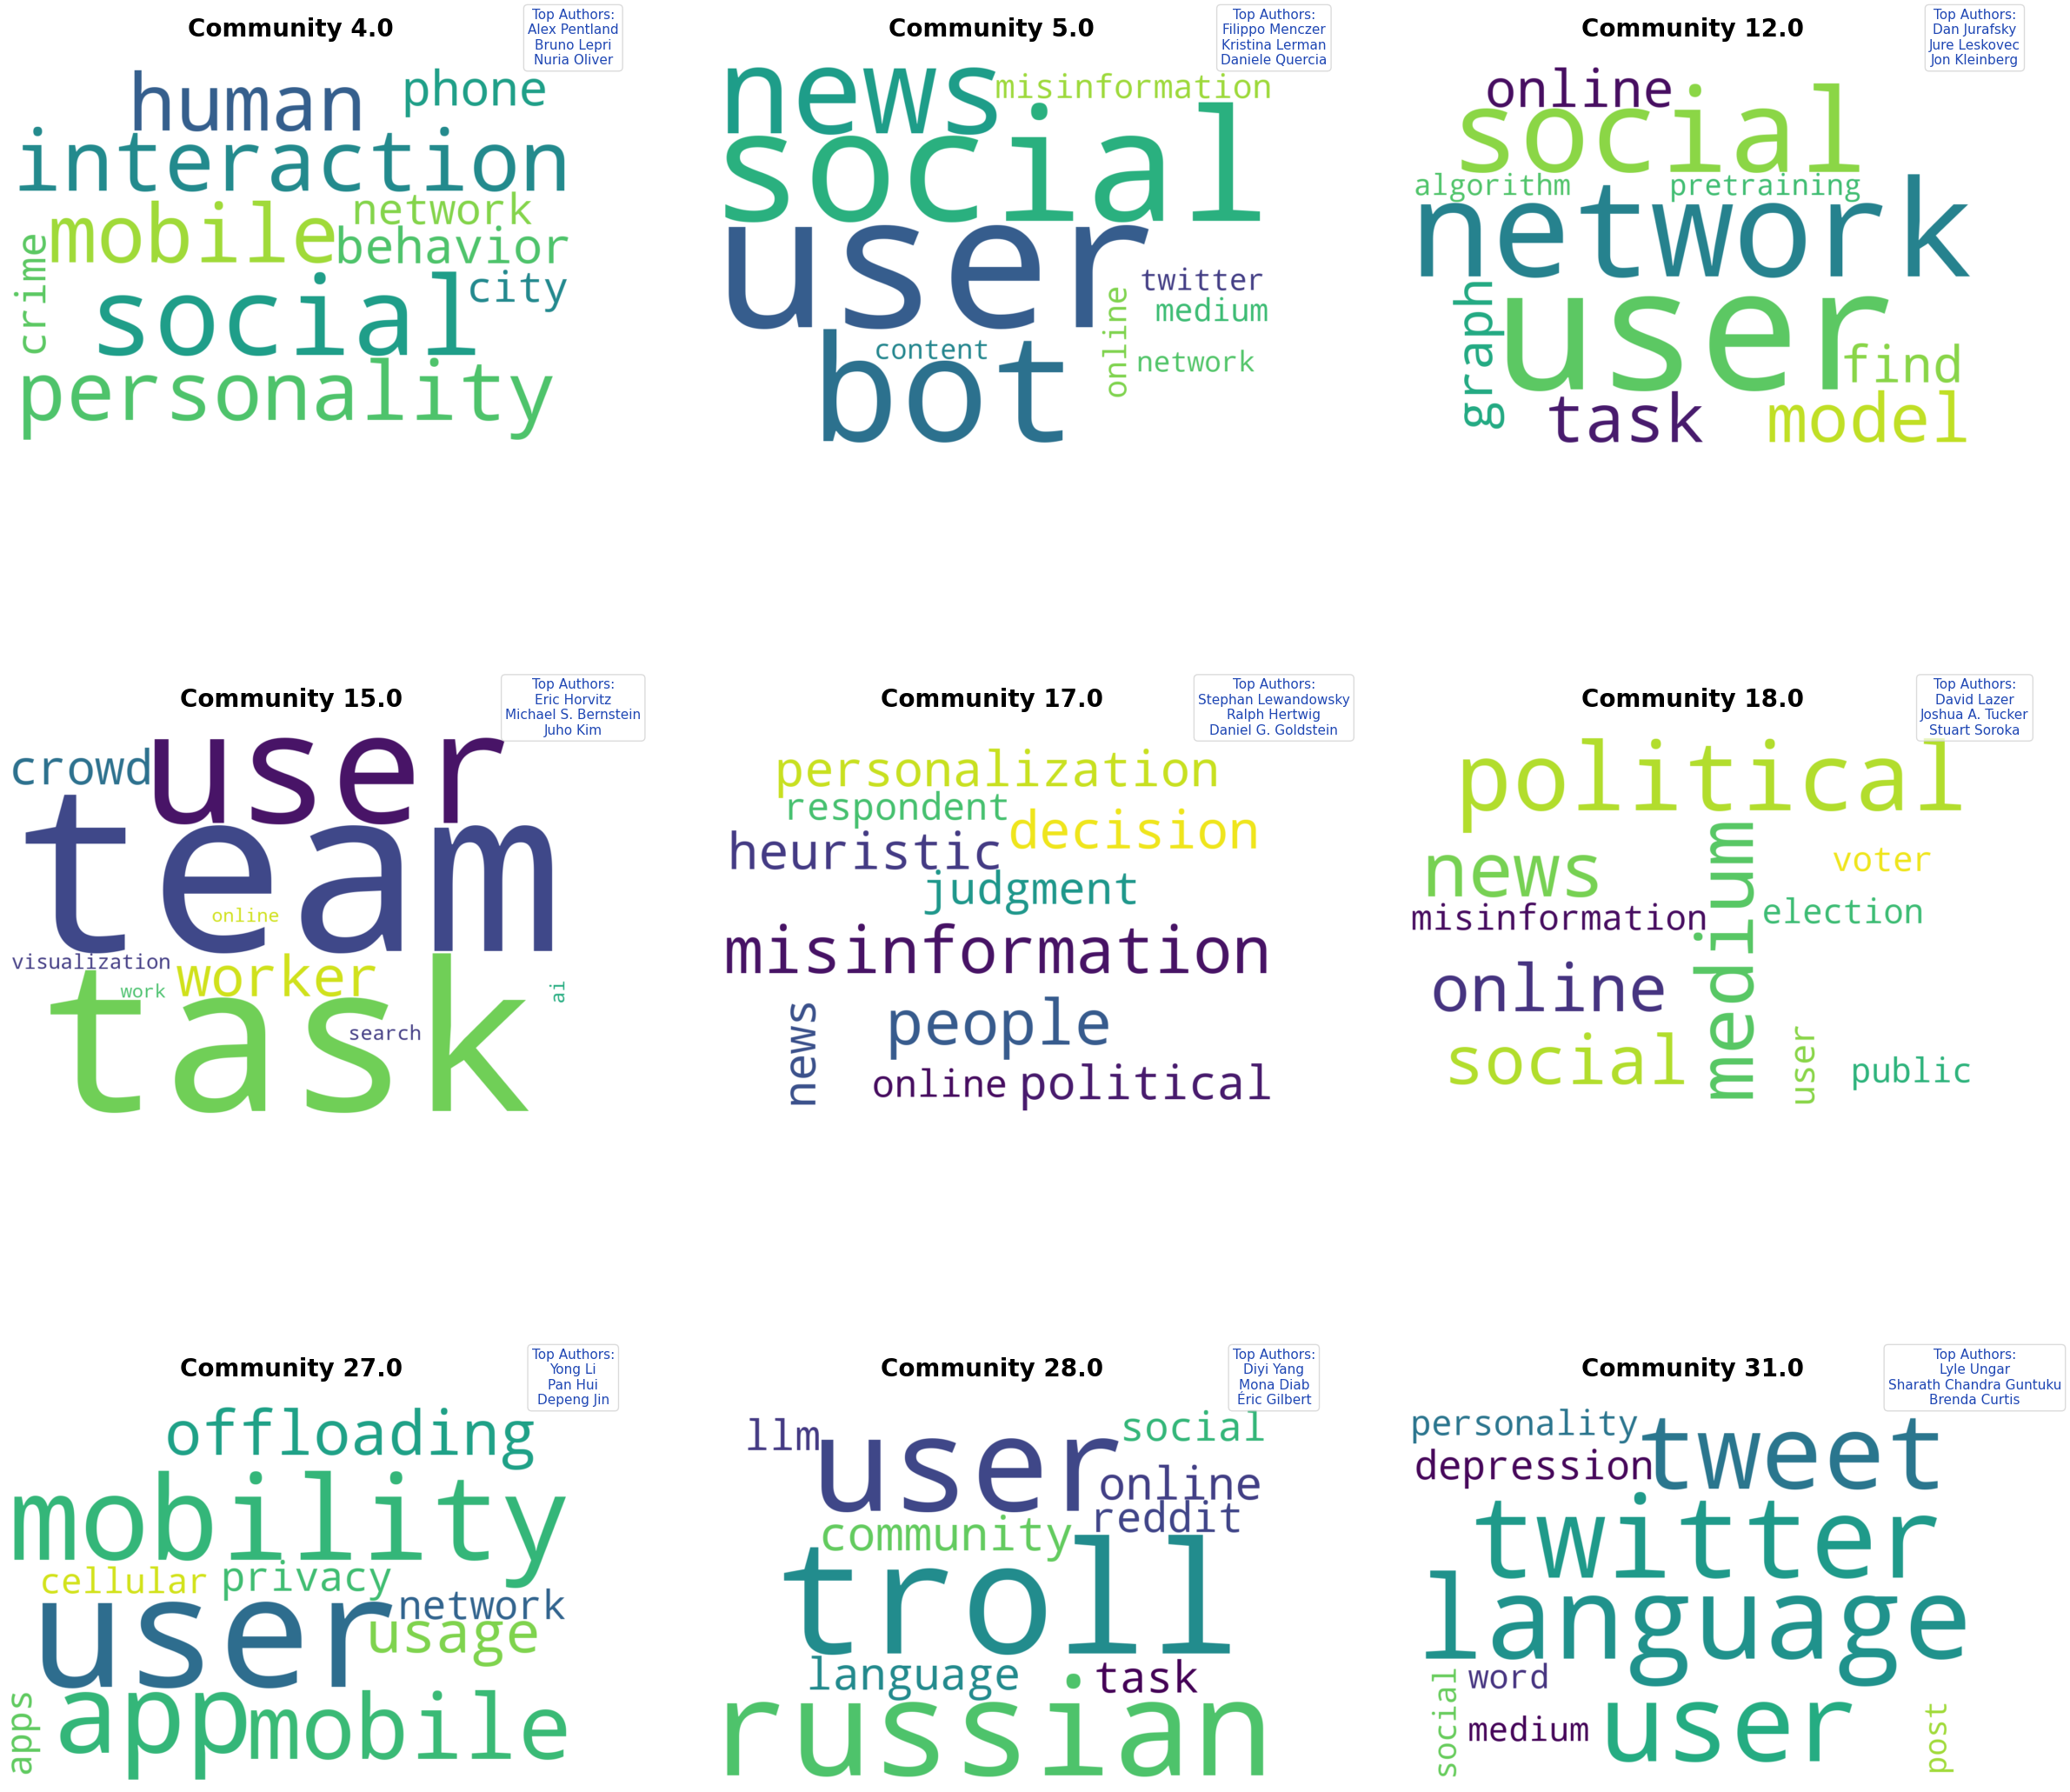

In [624]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Create author ID to name mapping
author_id_to_name = df_authors.set_index('id')['display_name'].to_dict()

# 2. Function to convert author IDs to names with fallback
def get_author_names(author_ids):
    return [author_id_to_name.get(aid, f"Unknown ({aid})") for aid in author_ids]

# 3. Prepare top authors data with names
df_author_deg_com['community'] = df_author_deg_com['community'].astype(float)
top_authors = (
    df_author_deg_com.sort_values('degree', ascending=False)
    .groupby('community')
    .head(3)
    .groupby('community')['author']
    .apply(lambda x: get_author_names(x.tolist()))
    .to_dict()
)

# 4. Set up visualization
fig, axes = plt.subplots(3, 3, figsize=(25, 25))
axes = axes.flatten()

# 5. Style configuration with author name adjustments
style = {
    'wordcloud': {
        'width': 1200,
        'height': 800,
        'background_color': 'white',
        'colormap': 'viridis',
        'max_words': 10,
        'prefer_horizontal': 0.8,
        'collocations': False
    },
    'authors': {
        'fontsize': 11,  # Reduced for better name fitting
        'y_position': 1,  
        'x_position': 1,
        'color': '#1f47b4', 
        'bbox': dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor='0.8'),
        'line_spacing': 1.2
    }
}

# 6. Generate word clouds using TF-IDF scores
for idx, (community, row) in enumerate(top_communities_df9.iterrows()):
    ax = axes[idx]
    
    # Create word cloud from TF-IDF scores
    tfidf_scores = row['TF-IDF']
    wc = WordCloud(**style['wordcloud']).generate_from_frequencies(tfidf_scores)
    
    # Get top author names
    authors = top_authors.get(row['community'], ["Authors unavailable"])[:3]
    
    # Plot word cloud
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f"Community {row['community']}", fontsize=20, pad=25, fontweight='bold')
    ax.axis('off')
    
    # Add authors with improved formatting
    ax.text(
        x=style['authors']['x_position'],
        y=style['authors']['y_position'],
        s="Top Authors:\n" + "\n".join(authors),
        ha='center',
        va='bottom',
        transform=ax.transAxes,
        fontsize=style['authors']['fontsize'],
        color=style['authors']['color'],
        bbox=style['authors']['bbox'],
        linespacing=style['authors']['line_spacing']
    )

# 7. Hide empty subplots and finalize
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=5)
plt.savefig('community_wordclouds_with_names.png', dpi=300, bbox_inches='tight')
plt.show()

> Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?

There is a clear segmentation of communities, overall we get the following initial idea just from looking at the point clouds

Community 4 seems to be focused on behaviour on the mobile phone, with focus on criminal behvaour
 
Community 5 seems to be focused on bots, something with fake news being spread
 
Community 12 seems to be focused on social networks, algorithms and graph
 
Community 15 seems to be focused on teams and task

Community 17 seems to be focused on political misinformation online

Community 18 seems to be focused on political misinformation regarding elections 

Community 27 seems to be focused on users of apps and usage 

Community 28 seems to be focused on russian trolls online

Community 31 seems to be focused on twitter langaunge online between users


**Look up online the top author in each community. In light of your search, do your results make sense?**

Community 4 author: Alex Pentalnd, is a MIT professor and have published various books on social science and esepeciaily behavour networks between humans. 

Community 5 author: Filippo menczer, is a scientist focusing on misinformation on social media

Community 12 author: Dan Jurafsky is a professor at standford and has worked with natural language processing (NLP) 

Community 15: author: Erik horvitz is a data scientist that has worked with "descision making under uncertaincy" 

Community 17: author ​Stephan Lewandowsky is a cognitive scientist and professor his work also explores why individuals may reject well-established scientific facts

Community 18: author David Lazer is a scientist and professor his work often focuses on social media, political behavior, and the use of computational methods to analyze social networks and public opinion

Community 28: author Diyi yang is a scientist who has been working with NLP's and more specificaly NLP with specific dialects

Community 31: author Lyle Ungar is a scientist who has been working with analysis of langauge on twitter with focus on mental health 

**its possible to conclide that the communties make sense the way they have been segmented**


### 3.3.1: Computational Social Science

 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__

Revised version of week 1, excersize 1:
- Based on what you know so far, come up with three social science topics that you think it would be interesting and possible to work on using computational social science methods.

First topic would be app usage of individuals, here it would be possible to look at what apps and how long (+ age, gender, occupuation, etc), it would be possible to make a network (nodes are persons, edges are using simmilar apps), where there would be communties of users, using specific apps. This could help reveal whether specific apps attract distinct social groups and what characteristics define these groups.

Second topic would be online opinion on public transport, here it would be possible to identify atleast two groups, using and not using public transport, Using natural language processing (NLP) methods like word clouds and sentiment analysis, we could compare how each group discusses public transportation. This would help uncover differences in perceptions, common concerns, and overall sentiment toward public transport systems. 

Third topic would be the gender pay gap, by looking at a specific job title, and seeing different work places with this job and making a network with (age, paycheck, experiance etc) where nodes would be the person and edges would be similar salary, and seeing if there are any specific communities. 



**Has our understanding been changed?** Our understanding has not completely changed but has been strengthened. By implementing our own data-driven methods on real, web-scraped data, we have been able to uncover hidden structures within the data. This process highlights how powerful social data science can be when applied correctly, and it have made it easier to identify what topics would be possible to work with